# Contexto do notebook 🗯️

Notebook destinado ao bootcamp oferecido pelo Kaggle. Contitui-se de um curso atrelado ao universo do Machine Learning, no qual apresenta os fundamentos dessa aprendizagem relacionada a um estudo de caso, no primeiro momento, que é de prever o valor de imóveis com base em certas características.

link do csv : https://www.kaggle.com/code/brunolod/exercise-explore-your-data/edit

## Bibliotecas 📚

In [50]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.formula.api as sm

from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import mean_absolute_error
from sklearn.dummy import DummyRegressor
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.tree import DecisionTreeRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, mean_squared_error, r2_score

In [2]:
home_data = pd.read_csv('/content/melb_data.csv')

# Verificando o dataset:
home_data.head()

,Suburb,Address,Rooms,Type,Price,Method,SellerG,Date,Distance,Postcode,...,Bathroom,Car,Landsize,BuildingArea,YearBuilt,CouncilArea,Lattitude,Longtitude,Regionname,Propertycount
0,Abbotsford,85 Turner St,2,h,1480000.0,S,Biggin,3/12/2016,2.5,3067.0,...,1.0,1.0,202.0,NaN,NaN,Yarra,-37.7996,144.9984,Northern Metropolitan,4019.0
1,Abbotsford,25 Bloomburg St,2,h,1035000.0,S,Biggin,4/02/2016,2.5,3067.0,...,1.0,0.0,156.0,79.0,1900.0,Yarra,-37.8079,144.9934,Northern Metropolitan,4019.0
2,Abbotsford,5 Charles St,3,h,1465000.0,SP,Biggin,4/03/2017,2.5,3067.0,...,2.0,0.0,134.0,150.0,1900.0,Yarra,-37.8093,144.9944,Northern Metropolitan,4019.0
3,Abbotsford,40 Federation La,3,h,850000.0,PI,Biggin,4/03/2017,2.5,3067.0,...,2.0,1.0,94.0,NaN,NaN,Yarra,-37.7969,144.9969,Northern Metropolitan,4019.0
4,Abbotsford,55a Park St,4,h,1600000.0,VB,Nelson,4/06/2016,2.5,3067.0,...,1.0,2.0,120.0,142.0,2014.0,Yarra,-37.8072,144.9941,Northern Metropolitan,4019.0


In [4]:
home_data.shape

(13580, 21)

## Verificando os dados do dataset 🔍

Etapa destinada a verificação dos dados do dataset, no que se refere aos dados duplicados, nulos ou não disponíveis

In [5]:
home_data.isnull().sum()

Suburb              0
Address             0
Rooms               0
Type                0
Price               0
Method              0
SellerG             0
Date                0
Distance            0
Postcode            0
Bedroom2            0
Bathroom            0
Car                62
Landsize            0
BuildingArea     6450
YearBuilt        5375
CouncilArea      1369
Lattitude           0
Longtitude          0
Regionname          0
Propertycount       0
dtype: int64

In [7]:
# Quantidade total de dados nulos:
qt_nulos = home_data.isna().sum().sum()
qt_nulos

13256

In [8]:
home_data.shape[0]

13580

In [9]:
home_data.duplicated().sum()

0

In [10]:
# Ainda que não seja necessariamente a melhor prática,
# considerando a proporcionalidade dos dados nulos
# no dataframe original, no primeiro momento irei
# excluir os dados que estão disponíveis, considerando
# apenas os que estão.

home_data = home_data.dropna(axis = 0)

home_data.shape

(6196, 21)

In [11]:
# Verificando se há ainda dados nulos.

home_data.isna().sum()

Suburb           0
Address          0
Rooms            0
Type             0
Price            0
Method           0
SellerG          0
Date             0
Distance         0
Postcode         0
Bedroom2         0
Bathroom         0
Car              0
Landsize         0
BuildingArea     0
YearBuilt        0
CouncilArea      0
Lattitude        0
Longtitude       0
Regionname       0
Propertycount    0
dtype: int64

## Sumário estatístico acerca dos dados 📝

In [12]:
home_data.describe()

,Rooms,Price,Distance,Postcode,Bedroom2,Bathroom,Car,Landsize,BuildingArea,YearBuilt,Lattitude,Longtitude,Propertycount
count,6196.000000,6.196000e+03,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000,6196.000000
mean,2.931407,1.068828e+06,9.751097,3101.947708,2.902034,1.576340,1.573596,471.006940,141.568645,1964.081988,-37.807904,144.990201,7435.489509
std,0.971079,6.751564e+05,5.612065,86.421604,0.970055,0.711362,0.929947,897.449881,90.834824,38.105673,0.075850,0.099165,4337.698917
min,1.000000,1.310000e+05,0.000000,3000.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1196.000000,-38.164920,144.542370,389.000000
25%,2.000000,6.200000e+05,5.900000,3044.000000,2.000000,1.000000,1.000000,152.000000,91.000000,1940.000000,-37.855438,144.926198,4383.750000
50%,3.000000,8.800000e+05,9.000000,3081.000000,3.000000,1.000000,1.000000,373.000000,124.000000,1970.000000,-37.802250,144.995800,6567.000000
75%,4.000000,1.325000e+06,12.400000,3147.000000,3.000000,2.000000,2.000000,628.000000,170.000000,2000.000000,-37.758200,145.052700,10175.000000
max,8.000000,9.000000e+06,47.400000,3977.000000,9.000000,8.000000,10.000000,37000.000000,3112.000000,2018.000000,-37.457090,145.526350,21650.000000


In [13]:
home_data.columns

Index(['Suburb', 'Address', 'Rooms', 'Type', 'Price', 'Method', 'SellerG',
       'Date', 'Distance', 'Postcode', 'Bedroom2', 'Bathroom', 'Car',
       'Landsize', 'BuildingArea', 'YearBuilt', 'CouncilArea', 'Lattitude',
       'Longtitude', 'Regionname', 'Propertycount'],
      dtype='object')

## Legenda 📝

- 'Suburb':

Nome do bairro onde o imóvel está localizado. Impacto: Alto. Bairros diferentes possuem características distintas que influenciam diretamente no preço, como infraestrutura, proximidade a serviços, e status social.

- 'Address':

Endereço completo do imóvel. Impacto: Baixo a Médio. Embora possa influenciar, o endereço completo em si geralmente não é um fator determinante para modelos de aprendizado de máquina.

- 'Rooms':

Número de cômodos. Impacto: Alto. Um fator crucial, diretamente relacionado ao tamanho e utilidade do imóvel.
'Type': Tipo de imóvel (ex: casa, apartamento, estúdio). Impacto: Alto. A tipologia influencia o preço, pois impacta as características e o público-alvo.

- 'Price':

Preço do imóvel. Variável Alvo. Essa é a variável que você quer prever! 🎯

- 'Method':

Método de venda (ex: leilão, venda privada). Impacto: Médio. Pode influenciar o preço final, mas não é um fator tão determinante quanto outros.

- 'SellerG':

Nome da imobiliária/vendedor. Impacto: Baixo a Médio. A reputação de uma imobiliária pode ter algum impacto, mas geralmente não é um fator determinante.

- 'Date':

Data da venda. Impacto: Médio. Útil para capturar tendências temporais do mercado imobiliário.
- 'Distance':

Distância ao centro da cidade ou a um ponto de referência. Impacto: Alto. Proximidade a centros comerciais e facilidades impacta o preço.

- 'Postcode':

Código postal. Impacto: Médio. Pode ser útil para agrupar imóveis por região, mas geralmente é menos informativo que o nome do bairro.

- 'Bedroom2':

Número de quartos. Impacto: Alto. Recurso importante, influencia diretamente o preço.

- 'Bathroom':

 Número de banheiros. Impacto: Alto. Assim como quartos, impacta o preço.

- 'Car':

Número de vagas na garagem. Impacto: Médio a Alto. Um fator relevante, especialmente em áreas onde ter um carro é essencial.

- 'Landsize':

Tamanho do terreno. Impacto: Médio a Alto. Influencia o preço, especialmente em áreas com maior densidade demográfica.

- 'BuildingArea':

Área construída. Impacto: Alto. Um fator crucial, define o tamanho útil do imóvel.

- 'YearBuilt':

Ano de construção. Impacto: Médio. Imóveis mais novos tendem a ter um preço maior.

- 'CouncilArea':

Área de Conselho (divisão administrativa). Impacto: Médio. Pode ser útil para capturar variações regionais.

- 'Lattitude':



 Latitude da localização. Impacto: Médio. Pode ser útil em conjunto com a longitude para localização.

- 'Longtitude':


 Longitude da localização. Impacto: Médio. Idem acima.

- 'Regionname':

Nome da região. Impacto: Médio. Fornece informação similar a 'Suburb', mas em um nível mais amplo.

- 'Propertycount':

Número de imóveis na região. Impacto: Baixo a Médio. Pode indicar a oferta de imóveis na região, mas não é um fator determinante.

## Selecionando as variáveis que apresentam mais impacto na formação dos preços 🎯

No primeiro momento, as variáveis (colunas) que apresentam mais impacto na formação de preços, uma vez que capturam as informações essenciasi sobre o imóvel são :

- Price (variável target) ;
- Rooms ;
- Type ;
- Distance ;
- Bedroom 2 ;
- Bathroom ;
- Suburb ;
- Landsize ;
- YearBuilt ;
- Date ;
- Latitude ;
- Lontitude



In [14]:
# Dataframe selecionado :

df = home_data[['Rooms', 'Type', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize',
               'Suburb', 'YearBuilt', 'Date', 'Lattitude', 'Longtitude', 'Price']]

df.head()

,Rooms,Type,Distance,Bedroom2,Bathroom,Landsize,Suburb,YearBuilt,Date,Lattitude,Longtitude,Price
1,2,h,2.5,2.0,1.0,156.0,Abbotsford,1900.0,4/02/2016,-37.8079,144.9934,1035000.0
2,3,h,2.5,3.0,2.0,134.0,Abbotsford,1900.0,4/03/2017,-37.8093,144.9944,1465000.0
4,4,h,2.5,3.0,1.0,120.0,Abbotsford,2014.0,4/06/2016,-37.8072,144.9941,1600000.0
6,3,h,2.5,4.0,2.0,245.0,Abbotsford,1910.0,7/05/2016,-37.8024,144.9993,1876000.0
7,2,h,2.5,2.0,1.0,256.0,Abbotsford,1890.0,8/10/2016,-37.8060,144.9954,1636000.0


In [15]:
# Transformando a coluna Date, que está em formato object
# para float, considerando apenas o ano.

df['Date'] = df['Date'].str.split('/').str[-1].astype(float)

df.head()

<ipython-input-15-595b3153575f>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Date'] = df['Date'].str.split('/').str[-1].astype(float)


,Rooms,Type,Distance,Bedroom2,Bathroom,Landsize,Suburb,YearBuilt,Date,Lattitude,Longtitude,Price
1,2,h,2.5,2.0,1.0,156.0,Abbotsford,1900.0,2016.0,-37.8079,144.9934,1035000.0
2,3,h,2.5,3.0,2.0,134.0,Abbotsford,1900.0,2017.0,-37.8093,144.9944,1465000.0
4,4,h,2.5,3.0,1.0,120.0,Abbotsford,2014.0,2016.0,-37.8072,144.9941,1600000.0
6,3,h,2.5,4.0,2.0,245.0,Abbotsford,1910.0,2016.0,-37.8024,144.9993,1876000.0
7,2,h,2.5,2.0,1.0,256.0,Abbotsford,1890.0,2016.0,-37.8060,144.9954,1636000.0


## Verificando a significância das variáveis explicativas em relação à target (Price)

### Matriz de correlação

Por meio da matriz de correlação, pode-se observar como as variáveis se comportam em relação à targer. Nota-se que a quantidade de quartos apresentam uma relação positiva com preço por exemplo, enquanto que ano construido negativa, podendo indicar que quanto mais antigo é o imóvel, menor tende a ser o seu preço.

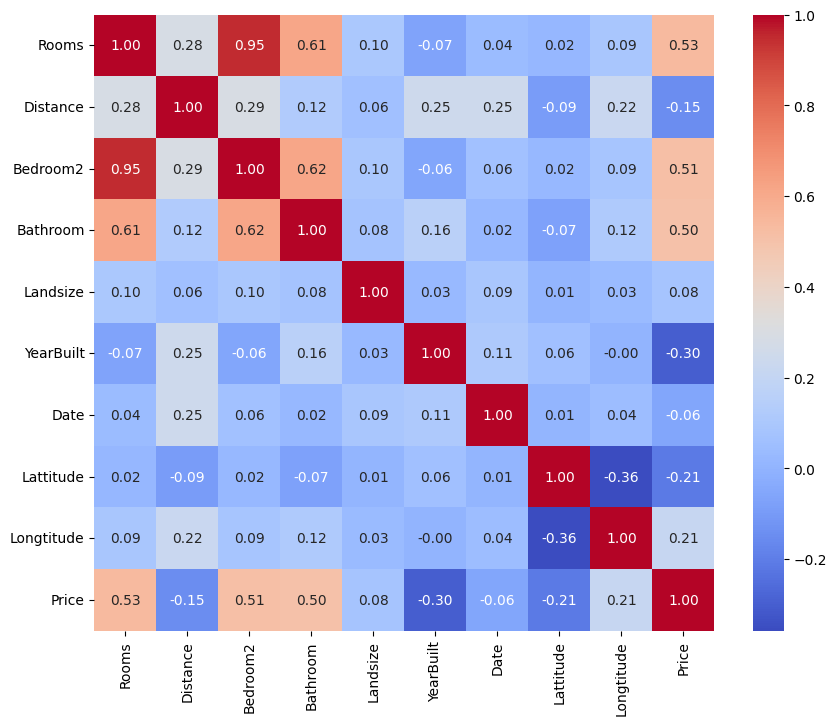

In [16]:
# Calculando a matriz de correlação
correlation_matrix = df.drop(['Type' ,'Suburb'], axis = 1).corr()

# Visualizando a matriz de correlação
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [17]:
# Intervalo das datas do dataframe:

print(f'Data máxima : {df.Date.max()}')
print(f'Data mínima : {df.Date.min()}')

Data máxima : 2017.0
Data mínima : 2016.0


In [18]:
# Segmentando os dados em sua porção explicativa e resposta:

# Explicativa - X
# Resposta - y

X = df[['Rooms', 'Distance', 'Bedroom2', 'Bathroom', 'Landsize',
               'YearBuilt', 'Date', 'Lattitude', 'Longtitude']]

y = home_data['Price']

## Gráfico de dispersão

Gráfico de dispersão que permite analisar a relação que cada variável explicativa apresenta com a variável resposta.

Por exemplo, no que tange ao tamanho do terreno, nota-se que a maior proporção dos dados está no intervalo de  [0 : 5000], a partir da qual começa a formar outliers. Não obstante, observa-se que o tamanho do terro, a partir desse intervalo não apresenta necessariamente uma relação positiva com o valor do imóvel, indicando que compreender o seu valor considerando principalmente seu tamanho é pouco efetivo.

Por outro lado, o gráfico da distância revela, como na matriz de correlação, uma relação inversamente proporcional à distância, de modo que os maiores preços estão no intervalo [0 : 15] aproximadamente. Isso pode indicar que os imóveis mais valorizados são aqueles que estão próximos do centro das cidades.

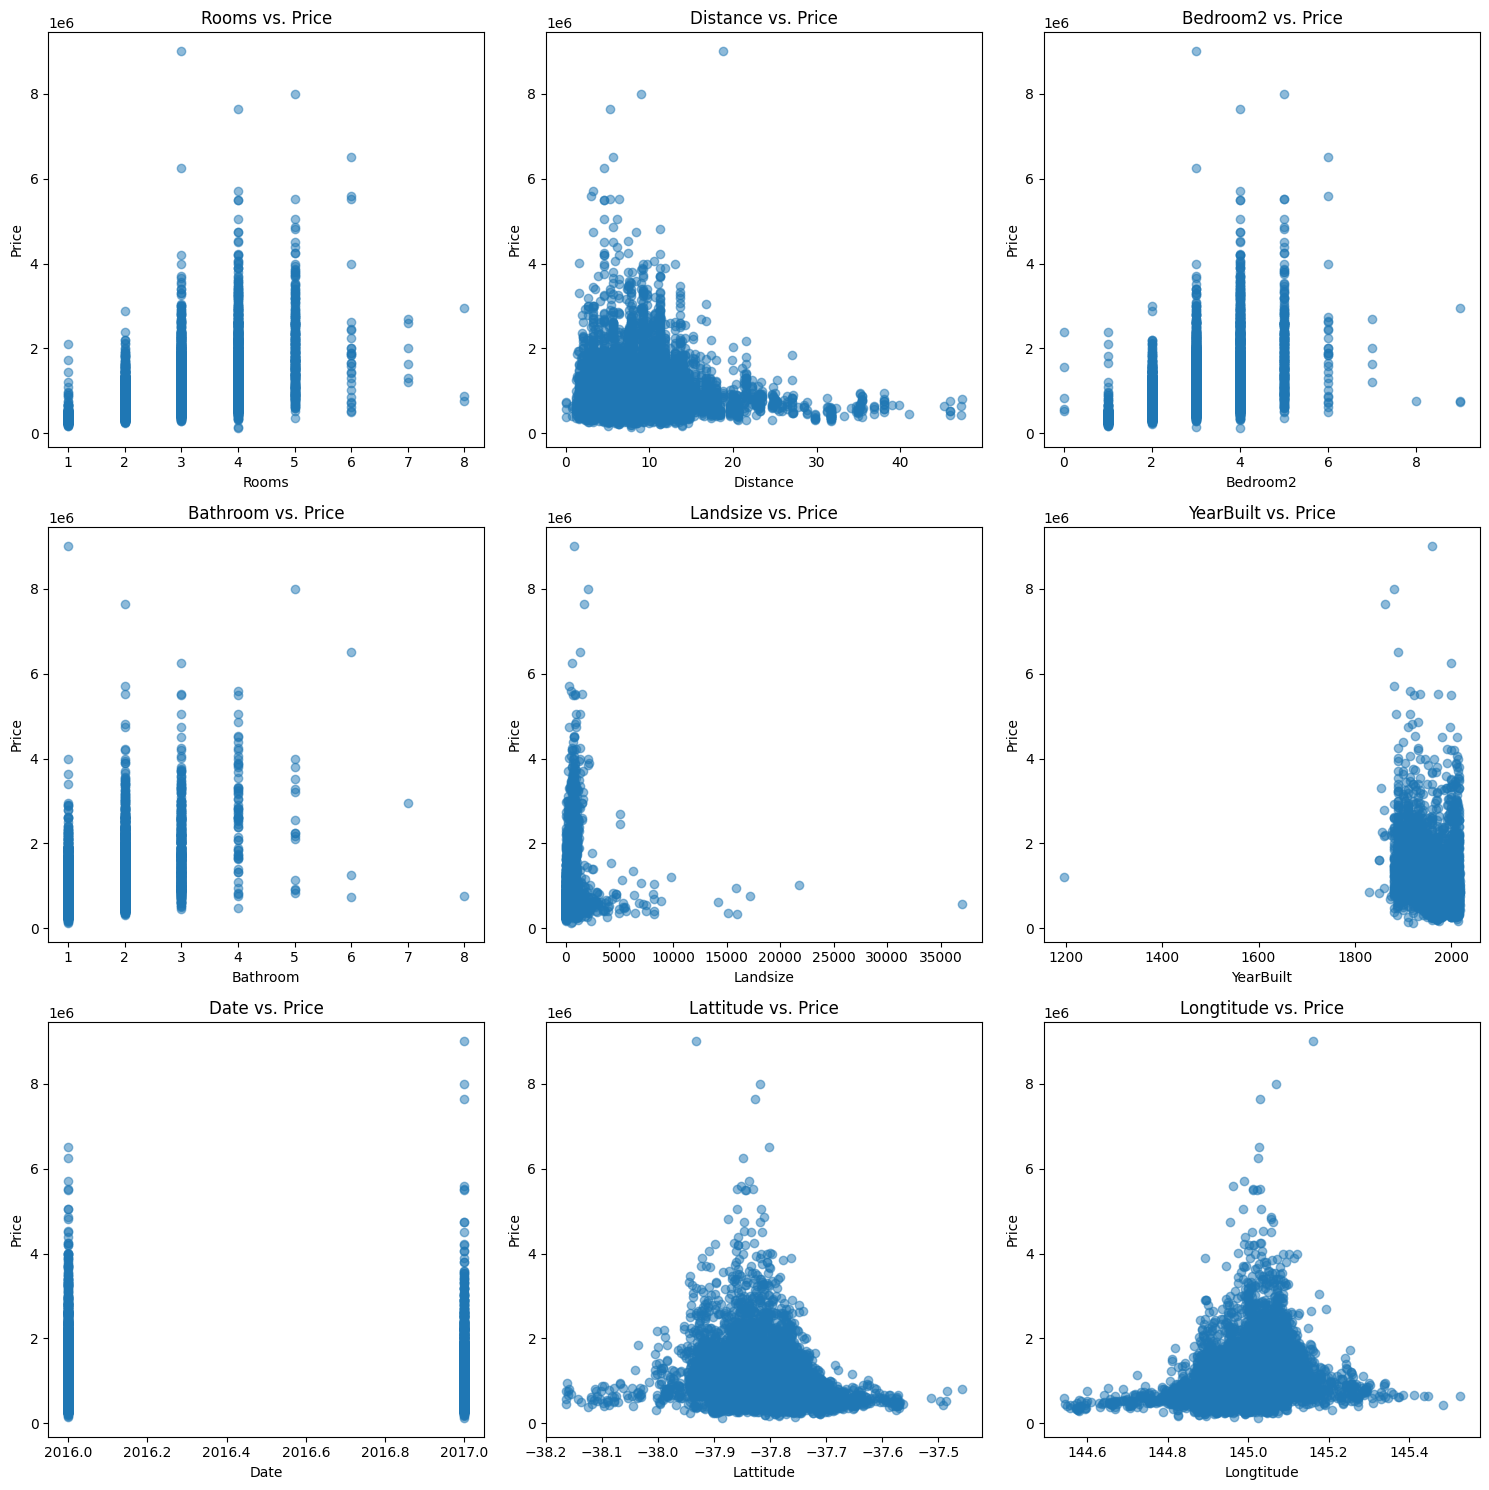

In [19]:
# Criando o layout para os gráficos
num_features = len(X.columns)
num_cols = 3  # Número de colunas no layout
num_rows = (num_features + num_cols - 1) // num_cols  # Calculando o número de linhas

# Criando a figura e os subplots
fig, axes = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(15, 5 * num_rows))
axes = axes.flatten()  # Transformando em um array 1D para facilitar a iteração

# Iterando pelas colunas e plotando os gráficos de dispersão
for i, column in enumerate(X.columns):
    axes[i].scatter(X[column], y, alpha=0.5)  # alpha controla a transparência dos pontos
    axes[i].set_title(f'{column} vs. Price')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Price')

# Ajustando o layout e exibindo o gráfico
plt.tight_layout()
plt.show()

## Regressão

In [20]:
# Criando a fórmula da regressão ( 'Price ~ feature1 + feature2 + ...')
formula = 'Price ~ ' + ' + '.join(X.columns)

# Criando o modelo de regressão linear
model = sm.ols(formula=formula, data=home_data)

# Ajustando o modelo aos dados
results = model.fit()

# Imprimindo os resultados
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.561
Model:                            OLS   Adj. R-squared:                  0.557
Method:                 Least Squares   F-statistic:                     135.1
Date:                Wed, 22 May 2024   Prob (F-statistic):               0.00
Time:                        21:00:27   Log-Likelihood:                -89409.
No. Observations:                6196   AIC:                         1.789e+05
Df Residuals:                    6137   BIC:                         1.793e+05
Df Model:                          58                                         
Covariance Type:            nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -1.882e+08   8.72

Considerando tanto os gráficos quanto o valor-p (nível de significância estatística) obtido por meio da regressão linear elaborada, considera-se que as variáveis mais representativas para a construção do modelo serão todas aquelas que já estavam sendo consideradas, com exceção de **Date**.

In [21]:
# Redefinindo as variáveis :
X = X.drop('Date', axis = 1)

In [22]:
# Verificando os conjuntos selecionados:
X.head()

,Rooms,Distance,Bedroom2,Bathroom,Landsize,YearBuilt,Lattitude,Longtitude
1,2,2.5,2.0,1.0,156.0,1900.0,-37.8079,144.9934
2,3,2.5,3.0,2.0,134.0,1900.0,-37.8093,144.9944
4,4,2.5,3.0,1.0,120.0,2014.0,-37.8072,144.9941
6,3,2.5,4.0,2.0,245.0,1910.0,-37.8024,144.9993
7,2,2.5,2.0,1.0,256.0,1890.0,-37.8060,144.9954


In [23]:
X.shape

(6196, 8)

## Construindo o modelo 🤖

Ao invés de criar o modelo propriamente dito no primeiro momento, irei criar uma árvore que servirá para a utilização da técnica de pós-poda, com a qual, por meio do ccp_alpha, métrica que controla a intensidade da poda da árvore, irei controlar o ajuste da árvore aos dados, visando não incorrer em cenários de overfitting.

Depois de encontrar o melhor valor de ccp_alpha, que informa o momento em que tanto o treino quanto o teste está com uma boa pontuação, irei passar o seu valor à árvore propriamente dita.

In [31]:
# Valor que garante a reprodutibilidade do modelo:
SEED = 22

In [40]:
# Separando os dados na porção de treino e teste:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                    random_state= SEED)

In [41]:
tree = DecisionTreeRegressor(random_state = SEED)

# Defina a grade de hiperparâmetros que você quer testar
parametros_grid = {
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [10, 25, 50],
    'max_leaf_nodes' : [75, 250, 500]
}

# Crie o objeto GridSearchCV
grid_search = GridSearchCV(estimator=tree, param_grid=parametros_grid,
                           cv=5, scoring='neg_mean_absolute_error')

# Ajuste o modelo aos seus dados de treino
grid_search.fit(X_train, y_train)

# Obtenha os melhores parâmetros
melhores_parametros = grid_search.best_params_
print("Melhores parâmetros:", melhores_parametros)


Melhores parâmetros: {'max_leaf_nodes': 500, 'min_samples_leaf': 10, 'min_samples_split': 2}


In [43]:
# Recriando o modelo com os novos parâmetros:

tree = DecisionTreeRegressor(max_leaf_nodes = 500, min_samples_leaf = 10, min_samples_split = 2,
                             random_state = SEED)

tree.fit(X_train, y_train)

predict = tree.predict(X_test)

In [46]:
mae_tree_regressor = mean_absolute_error(y_test, predict).round(2)

## Criando um modelo de Baseline

Eu criei o modelo da árvore de regressão, o qual me forneceu um valor acerca do seu erro absoluto, mas como posso compreender o quão bom ou ruim está a árvore criada ?

Para saber isso, temos que compará-la com outros modelos criados que sirvam de parâmetro. Um dos primeiros modelos que apresentam essa função é um Dummy, o qual serve de baseline para a análise, de modo que se o modelo criado apresentar valores semelhantes a ele, indica que está muito ruim e precisa ser reconsiderado.

In [47]:
# Criando o Dummy Regressor (usando a média como estratégia)
dummy_regressor = DummyRegressor(strategy="mean")

# Treinando o Dummy Regressor (não há muito o que treinar aqui)
dummy_regressor.fit(X_train, y_train)

# Fazendo previsões com o Dummy Regressor
dummy_predictions = dummy_regressor.predict(X_test)

# Calculando o erro absoluto médio para o DummyRegressor:
mae_dummy = mean_absolute_error(y_test, dummy_predictions)


## Comparando os modelos 🔬


In [48]:
# Avaliando os modelos:

print(f'MAE da árvore de regressão : {mae_tree_regressor.round(2)}')
print(f'MAE do Dummy Regressor : {mae_dummy.round(2)}')


MAE da árvore de regressão : 213784.05
MAE do Dummy Regressor : 484407.05


In [49]:
print(f'Percentual do erro do modelo Dummy em comparação com o criado : {(mae_tree_regressor / mae_dummy).round(3)}')

Percentual do erro do modelo Dummy em comparação com o criado : 0.441


## Utilizando o Random Forest 🌲🌲

Utilizarei o Random Forest para analisar o conjunto de dados e verficar se ele apresenta um maior ganho em relação ao modelo de baseline e de árvore de regressão anteriormente criada.

O Random forest é um modelo que pode ser compreendido como uma extrapolação das árvores de decisão ou regressão. A sua principal diferença é que ele gera uma determinada quantidade de árvores, as quais selecionarão de modo aleatório (ainda que com reposição) os dados, de modo que cada árvore presente é combinada para fazer uma previsão ou classificação final.

No caso de uma regressão, o valor encontrado é a média dos valores encontrados pelas árvores de decisão do modelo, enquanto que para a classificação se refere à classe a qual a maioria das árvores votaram.

In [53]:
r_forest = RandomForestRegressor(random_state = SEED)

parametros_grid = {
    'n_estimators': [50, 100, 200],  # Número de árvores na floresta
    'max_leaf_nodes' : [75, 250, 500],
    'min_samples_split': [5,10, 15],
    'min_samples_leaf': [10, 25, 50],
    'max_features': ['sqrt']  # Número de features a considerar em cada divisão
}

# 3. Crie o objeto GridSearchCV com MAE como métrica
grid_search = GridSearchCV(estimator=r_forest, param_grid=parametros_grid,
                           cv=5, scoring='neg_mean_absolute_error')

# 4. Ajuste o modelo aos seus dados de treino
grid_search.fit(X_train, y_train)

# 5. Obtenha os melhores parâmetros e o melhor modelo
melhores_parametros = grid_search.best_params_
melhor_modelo = grid_search.best_estimator_

print("Melhores parâmetros:", melhores_parametros)

Melhores parâmetros: {'max_features': 'sqrt', 'max_leaf_nodes': 250, 'min_samples_leaf': 10, 'min_samples_split': 5, 'n_estimators': 200}


In [55]:
r_forest = RandomForestRegressor(n_estimators = 200, min_samples_split = 5, min_samples_leaf = 10,
                                 max_leaf_nodes = 250, max_features = 'sqrt')

r_forest.fit(X_train, y_train)

rf_predict = r_forest.predict(X_test)


In [59]:
mae_r_forest = mean_absolute_error(y_test, rf_predict)

In [64]:
print(f'Percentual do erro absoluto médio do random forest em comparação com o da árvore de regressão : {(mae_r_forest.round(2) / mae_tree_regressor).round(2)}')
print(f'Percentual do erro absoluto médio do random forest em comparação com o do dummy regressor : {(mae_r_forest.round(2) / mae_dummy).round(2)}')

Percentual do erro absoluto médio do random forest em comparação com o da árvore de regressão : 0.92
Percentual do erro absoluto médio do random forest em comparação com o do dummy regressor : 0.41
